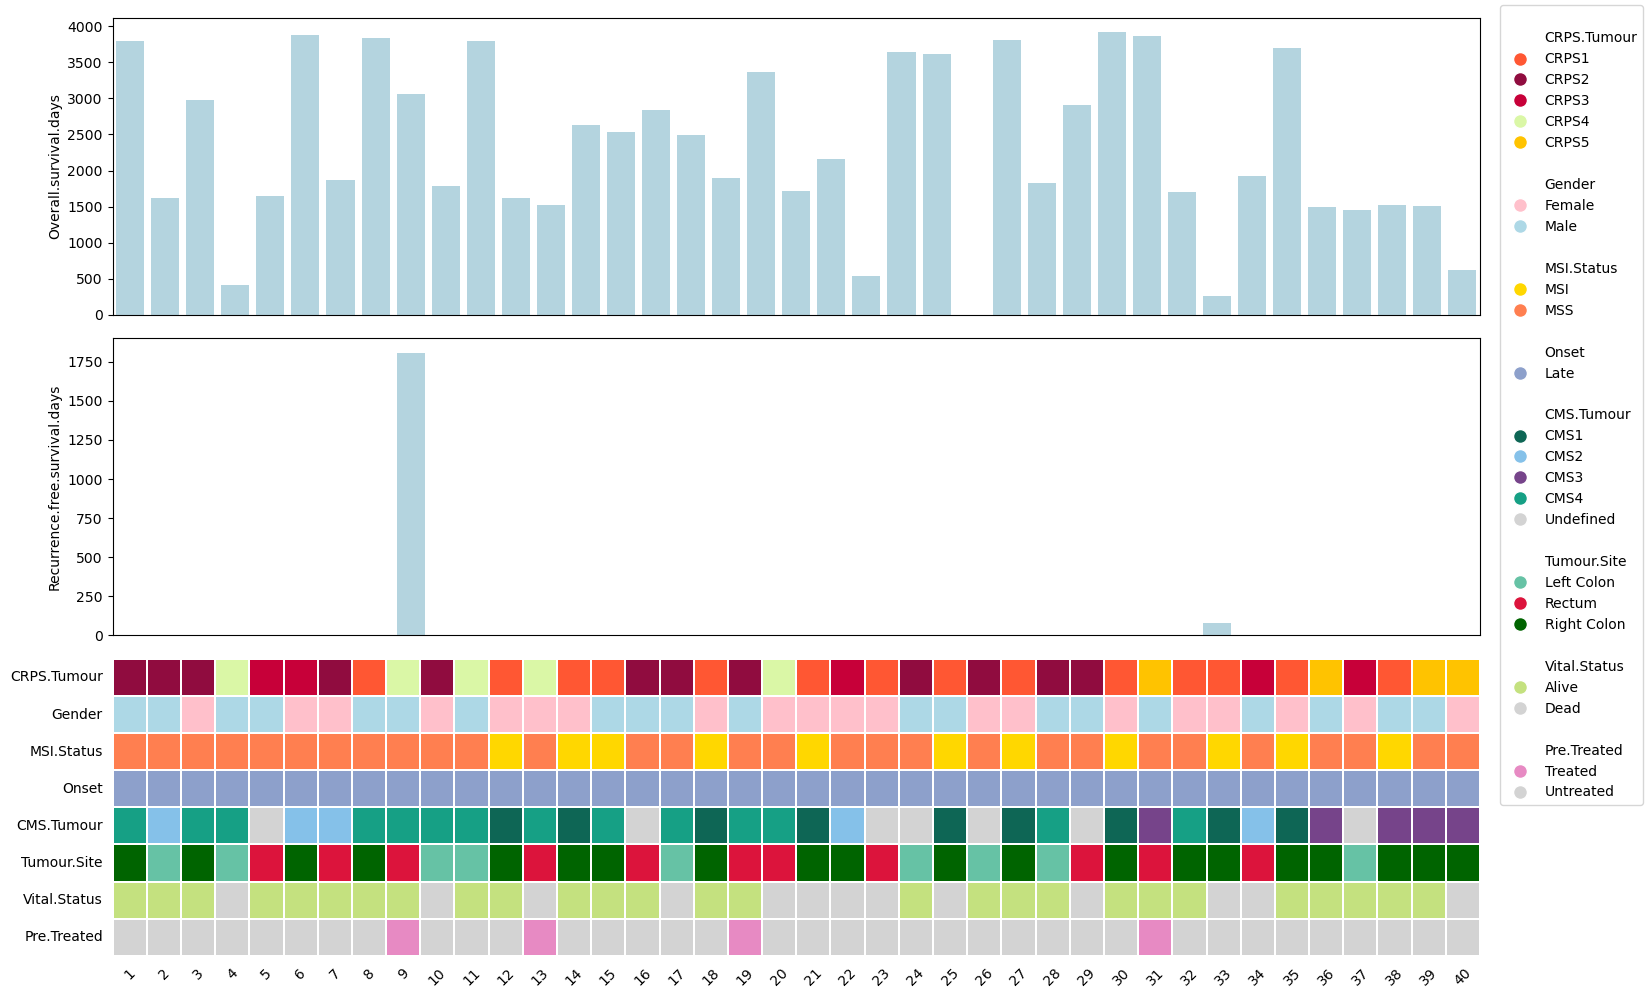

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import numpy as np

# Create a stacked heatmap + barplot  
def plot_stacked_tiles(metadata_file, categorical_columns, continuous_columns, category_colors):
    
    # Load metadata file into a pandas df
    df = pd.read_csv(metadata_file)
    
    # Extract sample IDs or use index names
    sample_ids = df['Sample.ID'] if 'Sample.ID' in df.columns else df.index
    
    # Create a custom color map for each col
    color_maps = {}
    for column, color_map in category_colors.items():
        unique_vals = df[column].unique()
        color_maps[column] = {val: color_map[i % len(color_map)] for i, val in enumerate(unique_vals)}
    
    # Factorize cols + map to colors
    factorized_data = df[categorical_columns].apply(lambda x: x.map(color_maps[x.name]).astype(str))

    # Set up the plt fig with larger heatmap
    fig, axs = plt.subplots(len(continuous_columns) + 1, 1, figsize=(15, 10), gridspec_kw={'height_ratios': [1] * len(continuous_columns) + [1]})
    
    # Make bar plots for continuous data cols
    for i, column in enumerate(continuous_columns):
        sns.barplot(x=sample_ids, y=df[column], ax=axs[i], color='lightblue')
        axs[i].set_ylabel(column)
        axs[i].set_xlabel("")
        axs[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    
    # Create a colormap for the heatmap
    all_colors = sum(category_colors.values(), [])
    colormap = ListedColormap(all_colors)
    
    # Convert color codes to integer labels for heatmap plotting
    color_labels = {color: i for i, color in enumerate(all_colors)}
    factorized_data_numeric = factorized_data.map(lambda color: color_labels[color])
    
    # Plot the heatmap for categorical data
    sns.heatmap(factorized_data_numeric.T, cmap=colormap, cbar=False, ax=axs[-1], linewidths=0.1)
    
    # Set y-ticks + labels for heatmap
    axs[-1].set_yticks([i + 0.5 for i in range(len(categorical_columns))])
    axs[-1].set_yticklabels(categorical_columns)
    
    # Set x-ticks + labels for heatmap
    axs[-1].set_xticks([i + 0.5 for i in range(len(df))])
    axs[-1].set_xticklabels(range(1, len(sample_ids) + 1), rotation=45)

    
    # Remove axis lines for heatmap
    axs[-1].spines['top'].set_visible(False)
    axs[-1].spines['right'].set_visible(False)
    axs[-1].spines['left'].set_visible(False)
    axs[-1].spines['bottom'].set_visible(False)
    
    # Remove x and y ticks for heatmap
    axs[-1].xaxis.set_ticks_position('none')
    axs[-1].yaxis.set_ticks_position('none')
    
    # Create a combined legend with spaces between columns
    all_handles = []
    all_labels = []
    legend_entries = []

    for column in categorical_columns:
        if column in color_maps:
            # Append a blank line for separation
            legend_entries.append((' ', ''))
            # Add column title
            legend_entries.append((f'{column}', ''))
            sorted_labels = sorted(color_maps[column].keys())
            for label in sorted_labels:
                handle = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_maps[column][label], markersize=10)
                legend_entries.append((label, handle))
    
    for label, handle in legend_entries:
        if handle:
            all_handles.append(handle)
            all_labels.append(label)
        else:
            # Use a dummy handle to create vertical spacing
            all_handles.append(plt.Line2D([0], [0], color='w', markersize=0, linestyle='-', linewidth=0))
            all_labels.append(label)

    # Adjust the number of columns and spacing in the legend
    legend = fig.legend(all_handles, all_labels, loc='upper right', bbox_to_anchor=(1.15, 1), title='', title_fontsize='13', fontsize='10', frameon=True, ncol=1)
    legend.set_bbox_to_anchor((1.1, 1))  # Position of the legend

    plt.tight_layout()
    plt.show()

###
metadata_file = "/Users/smarrakchi/Desktop/UCAN_pathology_subset_for_annotation.csv"  # Replace with the path to your CSV file
categorical_columns = ['CRPS.Tumour', 'Gender', 'MSI.Status', 'Onset', 'CMS.Tumour', 'Tumour.Site', 'Vital.Status', 'Pre.Treated']  # Replace with your actual columns
continuous_columns = ['Overall.survival.days', 'Recurrence.free.survival.days']  # Replace with your actual columns
category_colors = {
    'CRPS.Tumour': ["#900C3F","#DAF7A6","#C70039","#FF5733","#FFC300"],
    'Gender': ['lightblue', 'pink'],
    'MSI.Status': ['coral', 'gold'],
    'Onset': ['#8da0cb', 'yellow'],
    'CMS.Tumour': ["#16A085", "#85C1E9", "lightgrey", "#0E6655","#76448A"],
    'Tumour.Site': ['darkgreen', '#66c2a5',"crimson"],
    'Vital.Status': ['#c4e17f','lightgrey'],
    'Pre.Treated': ['lightgrey','#e78ac3']
}

plot_stacked_tiles(metadata_file, categorical_columns, continuous_columns, category_colors)
